In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
df = pd.read_csv('../input/titanic_data.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


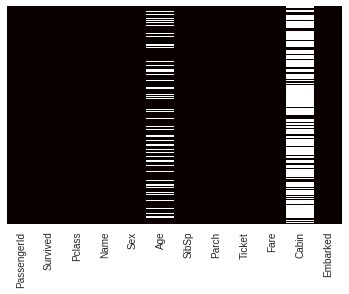

In [4]:
df_null = df.isnull()
sns.heatmap(df_null, yticklabels = False, cbar = False, cmap = 'hot')

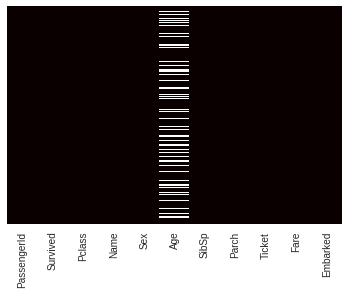

In [5]:
df.drop('Cabin', axis = 1, inplace = True)
df_null = df.isnull()
sns.heatmap(df_null, yticklabels = False, cbar = False, cmap = 'hot')

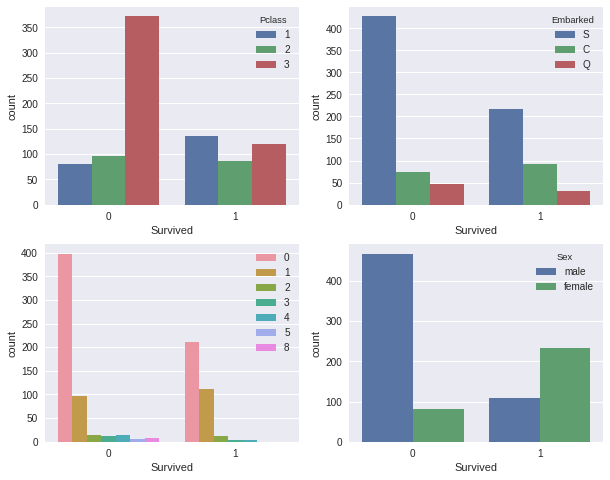

In [6]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (10,8))
sns.countplot(x = 'Survived', hue = 'Pclass', data = df, ax = ax1)
sns.countplot(x = 'Survived', hue = 'Embarked', data = df, ax = ax2)
sns.countplot(x = 'Survived', hue = 'SibSp', data = df, ax = ax3)
sns.countplot(x = 'Survived', hue = 'Sex', data = df, ax = ax4)
ax3.legend(loc = 1)

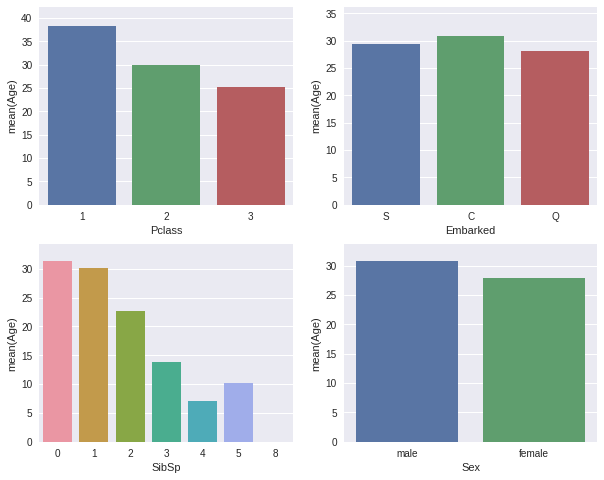

In [7]:
fig2, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (10,8))
sns.barplot(x = 'Pclass', y = 'Age', data = df, ax = ax1, errwidth = 0)
sns.barplot(x = 'Embarked', y = 'Age', data = df, ax = ax2, errwidth = 0)
sns.barplot(x = 'SibSp', y = 'Age', data = df, ax = ax3, errwidth = 0)
sns.barplot(x = 'Sex', y = 'Age', data = df, ax = ax4, errwidth = 0)


In [8]:
def age_pclass(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return df['Age'][df['Pclass'] == 1].mean()
        elif pclass == 2:
            return df['Age'][df['Pclass'] == 2].mean()
        else:
            return df['Age'][df['Pclass'] == 3].mean()
    else:
        return age

In [9]:
df['Age'] = df[['Age', 'Pclass']].apply(age_pclass, axis = 1)

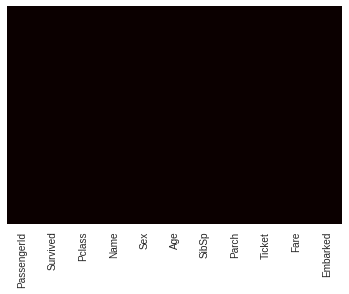

In [10]:
df_null = df.isnull()
sns.heatmap(df_null, yticklabels = False, cbar = False, cmap = 'hot')

In [11]:
df_dummy = pd.get_dummies(df.drop(['Name','Ticket'], axis = 1), drop_first = True)

In [12]:
df_dummy.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
feature = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']

In [15]:
X = df_dummy[feature]
y = df_dummy['Survived']

In [16]:
RF = RandomForestClassifier(n_estimators = 200)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
pred = RF.predict(X_test)
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[129  25]
 [ 31  83]]


             precision    recall  f1-score   support

          0       0.81      0.84      0.82       154
          1       0.77      0.73      0.75       114

avg / total       0.79      0.79      0.79       268



In [18]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 10)

In [19]:
KNN.fit(X_train, y_train)
pred_KNN = KNN.predict(X_test)

In [20]:
print(classification_report(y_test, pred_KNN))

             precision    recall  f1-score   support

          0       0.68      0.86      0.76       154
          1       0.71      0.46      0.56       114

avg / total       0.69      0.69      0.68       268



In [21]:
data = {}
for n in range(1,10):
    KNN = KNeighborsClassifier(n_neighbors = n)
    KNN.fit(X_train, y_train)
    pred_KNN = KNN.predict(X_test)
    score = KNN.score(X_test, y_test)
    data[n] = float(score)

In [22]:
data_x = []
data_y = []
for x, y in data.items():
    data_x.append(x)
    data_y.append(y)

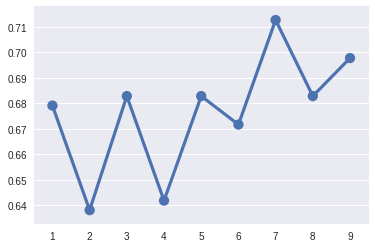

In [23]:
sns.pointplot(x = data_x, y = data_y)

In [24]:
KNN2 = KNeighborsClassifier(n_neighbors = 7)
KNN2.fit(X_train, y_train)
pred_KNN2 = KNN2.predict(X_test)
print(classification_report(y_test, pred_KNN2))

             precision    recall  f1-score   support

          0       0.72      0.82      0.77       154
          1       0.70      0.57      0.63       114

avg / total       0.71      0.71      0.71       268



In [25]:
from xgboost import XGBClassifier
XG = XGBClassifier()
XG.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       nthread=-1, objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [26]:
pred_XG = XG.predict(X_test)

In [27]:
cr = classification_report(y_test, pred_XG)
print(cr)

             precision    recall  f1-score   support

          0       0.81      0.90      0.85       154
          1       0.84      0.72      0.77       114

avg / total       0.82      0.82      0.82       268

